# Project - Customer Churn Prediction Model

In this project, our aim is to building a model for predicting churn. Customer churn (or attrition) is the percentage of customers that discontinue using a company’s products or services during a particular time period.

Thus, in the given dataset, our label will be the `Churn` column.


## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.

## Candidate Name : Michael Kiiru

## 1. Data Preparation / Pre-Processing

In [2]:
# Import required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read csv with customer records and sample few records with head() method of a dataframe.

df = pd.read_csv("churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [43]:
# Check the dataset dimensions. 

df.shape

(3333, 11)

In [4]:
# Load the glossary for all the 11 features of the dataset.

glossary = pd.read_csv('glossary.csv')
glossary

,Field,Description
0,Churn,The data label. Indicates whether the customer...
1,AccountWeeks,Age of the customer account.
2,ContractRenewal,Boolean field to indicate whether the contract...
3,DataPlan,Whether customer has data plan or not
4,DataUsage,Data usage to date for the customer
5,CustServCalls,How many times the customer has called the IVR...
6,DayMins,Total usage of day minutes in plan for the cus...
7,DayCalls,Total number of calls customer has made during...
8,MonthlyCharge,How much the customer has been charged per month
9,OverageFee,Extra amount of money the customer paysover th...


In [5]:
# .info() method to get more information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
# An alternative to checking if we have null values in the dataset

df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
# Check to see if we have duplicate customer records in the dataset. 
# Duplicate values may give the particular data object an advantage in machine learning algorithms.

df.duplicated().any()

False

In [10]:
# Check to confirm if indeed the boolean columns are not violated.

print(df['Churn'].unique())
print(df['DataPlan'].unique())
print(df['ContractRenewal'].unique())

[0 1]
[1 0]
[1 0]


<em> From the above examination, we notice that:
1. The dataset has 3,333 rows (customer records) and 11 columns (customer call features). 
2. The dataset has no null values (missing values) in any of the records.
3. All the features are numeric in data type (float64 and int64) 
4. The dataset does not have any duplicated customer records. 
5. For columns with boolean values, no extra values have been introduced but just 1s and 0s.

With this clarity, the dataset is ready for further exploration and analysis</em>

## 2. Exploratory Data Analysis

### 2.1 Univariate Analysis

In [11]:
# Summary statistics

df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


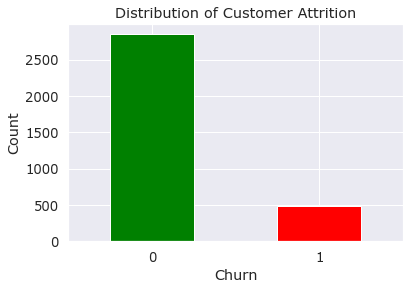

In [12]:
# Distribution of the label feature.

sns.set(font='verdana', font_scale=1.2, palette='deep', color_codes=True)
plt.figure(figsize = (6, 4))
df.Churn.value_counts().plot(kind = 'bar', rot = 0, color = ['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Customer Attrition')
plt.show()

In [51]:
# Tabular distribution of the label

print('Tabular Distibution of Customer Attrition: \n')
data.Churn.value_counts()

Tabular Distibution of Customer Attrition: 



0    2850
1     483
Name: Churn, dtype: int64

<em>Taking "1" for Yes and "0" for NO, we notice that our recordset has about 14% of the records where customers churned. This is an indication of an imbalanced dataset. </em>

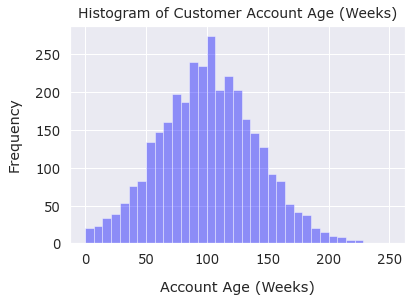

In [13]:
# Histogram distribution for the age of customer accounts.

sns.distplot(df['AccountWeeks'], kde = False, color='blue', hist_kws={"range": [0, 250]})
plt.xlabel("Account Age (Weeks)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Histogram of Customer Account Age (Weeks)", fontsize=14, y=1.01) 
plt.show()

<em>The customers' account age feature is normaly distributed with a mean of 101 weeks. </em>

### 2.2 Bivariate Analysis

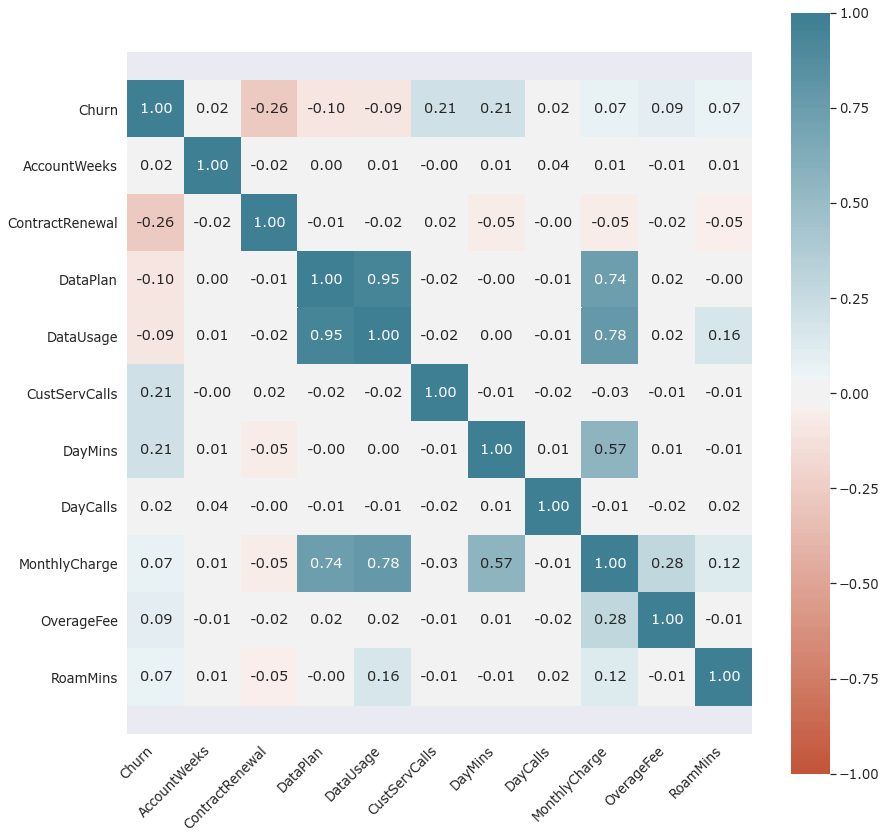

In [14]:
# Investigate to see if there is any significant correlation between the features of the dataset.

corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<em>From the above heatmap, we notice that `DataUsage` and `DataPlan` have a correlation coefficient of 0.95 (positive) indicating a very strong linear relationship between these variables. <br>
    
Other variables with strong correlation coefficients are `MonthlyCharge`/`DataPlan` at 0.74 (positive), `MonthlyCharge`/`DataUsage` at 0.78 (positive) <br>

We avoid highly correlated independent variables when creating machine learning models because they can skew the output. The above pairs are thus candidates for feature engineering.</em>

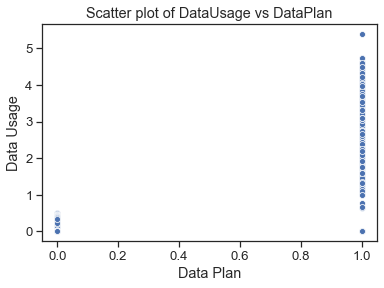

In [15]:
# Let's investigate the relationship between `DataPlan` and `DataUsage` using a scatter plot.

sns.set_style("ticks")
sns.scatterplot(x="DataPlan", y="DataUsage", data = df) 
plt.title('Scatter plot of DataUsage vs DataPlan') 
plt.xlabel('Data Plan') 
plt.ylabel('Data Usage');

<em>We further notice that the there are about 20% of the customer data records where even when there is no data plan for the customer, we still record data usage. We notice further that each of the two variables; `DataUsage` and `DataPlan` have strong correlation coefficients with `MonthlyCharge`. We therefore decompose these two to one feature `DataBill` by getting the product of the two variables.</em>

In [16]:
# Create a new feature based on the two features with high correlation coefficient drop both of them.

# Read the two features into vectors variables for ease of algebraic operations.
DataUsage = np.array(df['DataUsage'])
DataPlan = np.array(df['DataPlan'])


# Get the product of the two features to create a new feature 
DataBill = DataPlan*DataUsage

# Convert this to a dataframe `databill`
databill = pd.DataFrame(data=DataBill)

# Drop the two correlated columns and add their product as a new feature.
df.drop(columns = ['DataUsage', 'DataPlan'], inplace = True)

# Add the DataBill column to the original 
df['DataBill'] = databill[0]
df.head()

,Churn,AccountWeeks,ContractRenewal,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DataBill
0,0,128,1,1,265.1,110,89.0,9.87,10.0,2.7
1,0,107,1,1,161.6,123,82.0,9.78,13.7,3.7
2,0,137,1,0,243.4,114,52.0,6.06,12.2,0.0
3,0,84,0,2,299.4,71,57.0,3.10,6.6,0.0
4,0,75,0,3,166.7,113,41.0,7.42,10.1,0.0


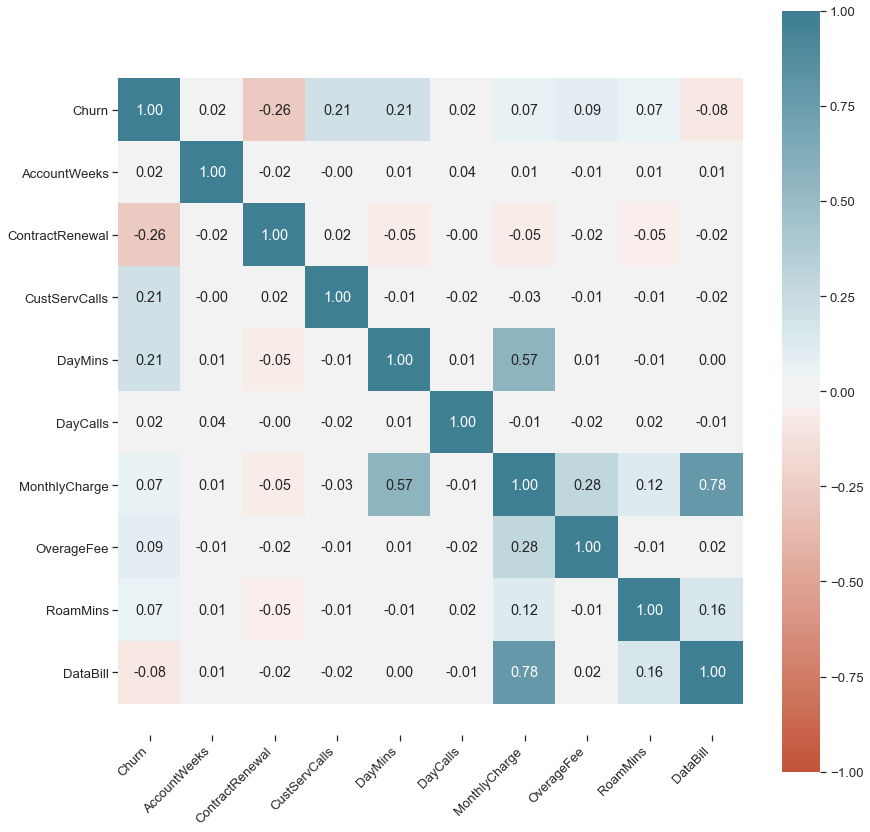

In [17]:
# With this new tweak, we reconfirm the correlation of the variables.

corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<em>With this we notice that our modification has resolved part of the earlier noted high correlation between variables, but have retained the `DataBill` and `MonthlyCharge` strong correlation of coefficient 0.78 (positive). From intuition, Monthly Charges are derived from all other elements of service consumption (data, Day calls, night minutes, roaming minutes, etc.) most of which are represented in the dataset. It will cause no harm then to drop the feature `MonthlyCharge`.</em>

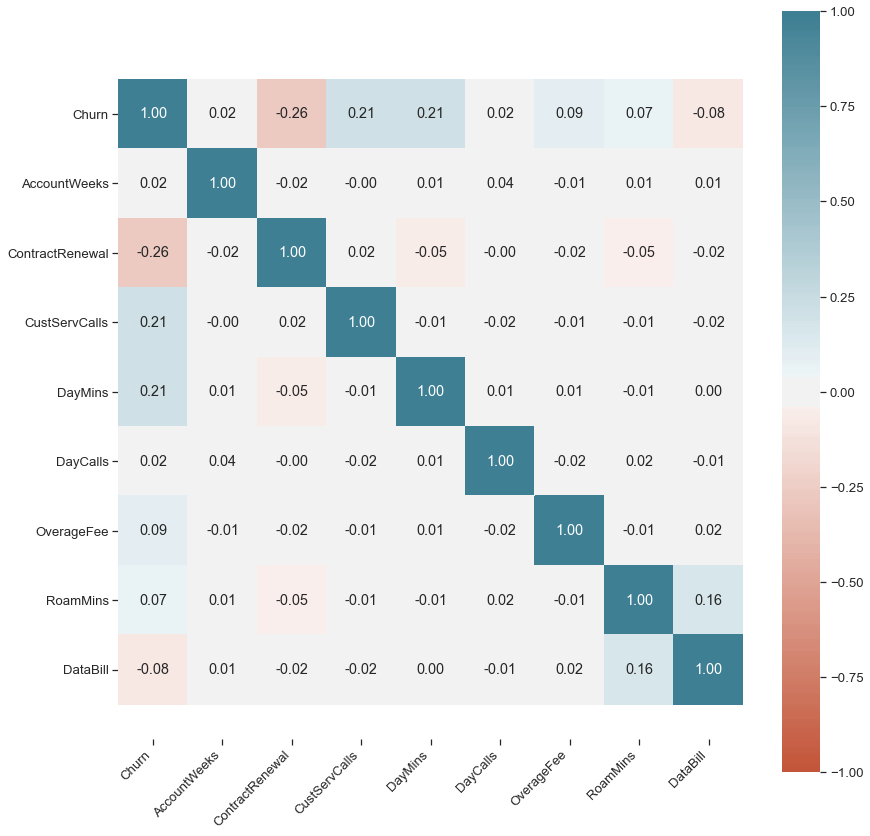

In [18]:
# Drop `MonthlyCharge` feature from the dataset.
df.drop(columns = ['MonthlyCharge',], inplace = True)

# Reconfirm the relationships.
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<em>We now have a clean dataset with no missing values, no duplicates and no correlated independent variables, that we can use to train our ML model</em>

In [19]:
# Write the data to a file for permanency.

df.to_csv(r'.\churn_shaped.csv', index = False)

## 3. Modelling and Testing


### 3.1 Logistic Regression

In [20]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [21]:
# Check the outliers

z = np.abs(stats.zscore(df))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 0.0715836 , 0.08500823,
        1.49091872],
       [0.41167182, 0.14906505, 0.32758048, ..., 0.10708191, 1.24048169,
        2.26115243],
       [0.41167182, 0.9025285 , 0.32758048, ..., 1.57434567, 0.70312091,
        0.58871229],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 1.73094204, 1.3837779 ,
        0.58871229],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.81704825, 1.87621082,
        0.58871229],
       [0.41167182, 0.67974475, 0.32758048, ..., 1.28129669, 1.24048169,
        2.26115243]])

In [22]:
# Count of identified outliers

outliers = list(set(np.where(z > 3)[0]))
len(outliers) 

406

In [67]:
# Drop the outliers
ml_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(ml_df)

y_new = y[list(ml_df["index"])]
len(y_new)

,index,Churn,AccountWeeks,ContractRenewal,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins,DataBill
0,0,0,128,1,1,265.1,110,9.87,10.0,2.70
1,1,0,107,1,1,161.6,123,9.78,13.7,3.70
2,2,0,137,1,0,243.4,114,6.06,12.2,0.00
3,6,0,121,1,3,218.2,88,17.43,7.5,2.03
4,8,0,117,1,1,184.5,97,17.58,8.7,0.00
...,...,...,...,...,...,...,...,...,...,...
2922,3327,0,79,1,2,134.7,98,9.49,11.8,0.00
2923,3328,0,192,1,2,156.2,77,10.78,9.9,2.67
2924,3329,0,68,1,3,231.1,57,7.67,9.6,0.00
2925,3330,0,28,1,2,180.8,109,14.44,14.1,0.00


IndexError: index 2927 is out of bounds for axis 0 with size 2927

In [24]:
# Create an array of labels.

y = np.array(ml_df['Churn'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# Prepare the data for ML training. (separate feature label from the independent features.) 

# Drop the label and the 'index' to form an array of predictors.
ml_df.drop(columns = ['index', 'Churn'], axis=1, inplace = True)
ml_df

,AccountWeeks,ContractRenewal,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins,DataBill
0,128,1,1,265.1,110,9.87,10.0,2.70
1,107,1,1,161.6,123,9.78,13.7,3.70
2,137,1,0,243.4,114,6.06,12.2,0.00
3,121,1,3,218.2,88,17.43,7.5,2.03
4,117,1,1,184.5,97,17.58,8.7,0.00
...,...,...,...,...,...,...,...,...
2922,79,1,2,134.7,98,9.49,11.8,0.00
2923,192,1,2,156.2,77,10.78,9.9,2.67
2924,68,1,3,231.1,57,7.67,9.6,0.00
2925,28,1,2,180.8,109,14.44,14.1,0.00


In [26]:
# Define the independent features in X object

X= np.array(ml_df)
X

array([[128.  ,   1.  ,   1.  , ...,   9.87,  10.  ,   2.7 ],
       [107.  ,   1.  ,   1.  , ...,   9.78,  13.7 ,   3.7 ],
       [137.  ,   1.  ,   0.  , ...,   6.06,  12.2 ,   0.  ],
       ...,
       [ 68.  ,   1.  ,   3.  , ...,   7.67,   9.6 ,   0.  ],
       [ 28.  ,   1.  ,   2.  , ...,  14.44,  14.1 ,   0.  ],
       [ 74.  ,   1.  ,   0.  , ...,  13.3 ,  13.7 ,   3.7 ]])

In [27]:
# Scaling the features

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(ml_df)
X_scaled

array([[ 0.69359836,  0.        , -0.42812509, ..., -0.07094413,
        -0.09907174,  1.50819772],
       [ 0.16414862,  0.        , -0.42812509, ..., -0.10699438,
         1.282333  ,  2.28464702],
       [ 0.92050538,  0.        , -1.25636179, ..., -1.59707146,
         0.72230405, -0.58821539],
       ...,
       [-0.81911516,  0.        ,  1.22834832, ..., -0.95217251,
        -0.2484128 , -0.58821539],
       [-1.82759084,  0.        ,  0.40011162, ...,  1.75960756,
         1.43167405, -0.58821539],
       [-0.66784381,  0.        , -1.25636179, ...,  1.30297103,
         1.282333  ,  2.28464702]])

In [28]:
from sklearn.model_selection import train_test_split, cross_validate

# Training the model with scaling and outliers removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9013680945858721
Test accuracy: 0.8828213879408419


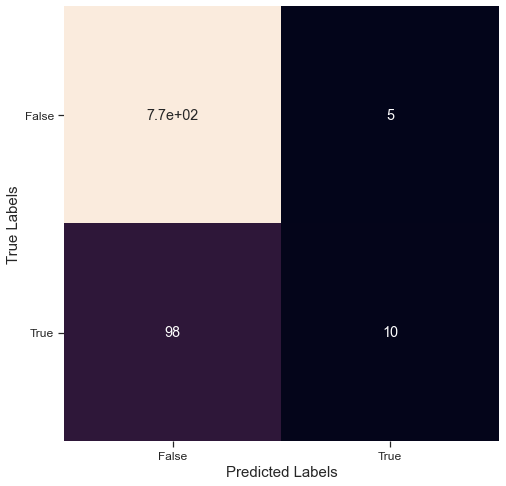

In [29]:
from sklearn.metrics import confusion_matrix

pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

plt.show()

In [31]:
# A check of the training accuracy without preprocessing. (Notice the X and y variables)
y_old = np.array(df['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))


Mean training accuracy: 0.899901818926048
Test accuracy: 0.8816837315130831


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       771
           1       0.75      0.06      0.10       108

    accuracy                           0.88       879
   macro avg       0.82      0.53      0.52       879
weighted avg       0.87      0.88      0.83       879



In [33]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.8816837315130831
Precision: 0.75
Recall: 0.05555555555555555
F1 Score: 0.10344827586206895


### 3.2 Linear Regression

In [44]:
# Confirm the values of preprocessed array X (predictors) and target y (predicted / dependent variable).

print('The values of array X is: \n', X)
print('\n\nThe values of target variable y is: \n', y)

The values of array X is: 
 [[128.     1.     1.   ...   9.87  10.     2.7 ]
 [107.     1.     1.   ...   9.78  13.7    3.7 ]
 [137.     1.     0.   ...   6.06  12.2    0.  ]
 ...
 [ 68.     1.     3.   ...   7.67   9.6    0.  ]
 [ 28.     1.     2.   ...  14.44  14.1    0.  ]
 [ 74.     1.     0.   ...  13.3   13.7    3.7 ]]


The values of target variable y is: 
 [0 0 0 ... 0 0 0]


In [47]:
# Scaling the features

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(ml_df)
X_scaled

array([[ 0.69359836,  0.        , -0.42812509, ..., -0.07094413,
        -0.09907174,  1.50819772],
       [ 0.16414862,  0.        , -0.42812509, ..., -0.10699438,
         1.282333  ,  2.28464702],
       [ 0.92050538,  0.        , -1.25636179, ..., -1.59707146,
         0.72230405, -0.58821539],
       ...,
       [-0.81911516,  0.        ,  1.22834832, ..., -0.95217251,
        -0.2484128 , -0.58821539],
       [-1.82759084,  0.        ,  0.40011162, ...,  1.75960756,
         1.43167405, -0.58821539],
       [-0.66784381,  0.        , -1.25636179, ...,  1.30297103,
         1.282333  ,  2.28464702]])

In [48]:
# We need the prerequisites libraries to help in the machine learning using linear regression algorithm.
# train_test_split splits arrays or matrices into random train and test subsets. 
# due to this randomness, we need to specify random_state so as to get the same result and hence reproducible project.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [54]:
# Create a lines regression model object
# fit() - fits a linear model, 
# score() - Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by 
# the model, as the proportion of total variation of outcomes explained by the model.

modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

print("Score of the train set : ",modelb.score(X_train,y_train))
print("Score of the test set : ",modelb.score(X_test,y_test))

Score of the train set :  0.11747851020999733
Score of the test set :  0.14254107460584187


Compute the Adjusted $R^2$

Adjusted $R^2$ indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted  $R^2$  will always be less than or equal to $R^2$ .

In [57]:
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

print("Adjusted R2 of the train set : ",adj_r2(X_train,y_train,modelb))
print("Adjusted R2 of the test set : ",adj_r2(X_test,y_test,modelb))

Adjusted R2 of the train set :  0.11401594428634843
Adjusted R2 of the test set :  0.13465639483210257


In [69]:
# .coef_ gives the coefficients and .intercept_ gives the estimated intercepts.

importance = modelb.coef_
for i in range(len(importance)):
    print("Feature:", df.columns[i], "		Score :", importance[i])

Feature: Churn 		Score : 0.008126682526565268
Feature: AccountWeeks 		Score : 2.688821387764051e-17
Feature: ContractRenewal 		Score : 0.056885267036735285
Feature: CustServCalls 		Score : 0.070251732572773
Feature: DayMins 		Score : 0.016853816972438332
Feature: DayCalls 		Score : 0.030051130166289134
Feature: OverageFee 		Score : 0.012115408386898776
Feature: RoamMins 		Score : -0.033627200367579595


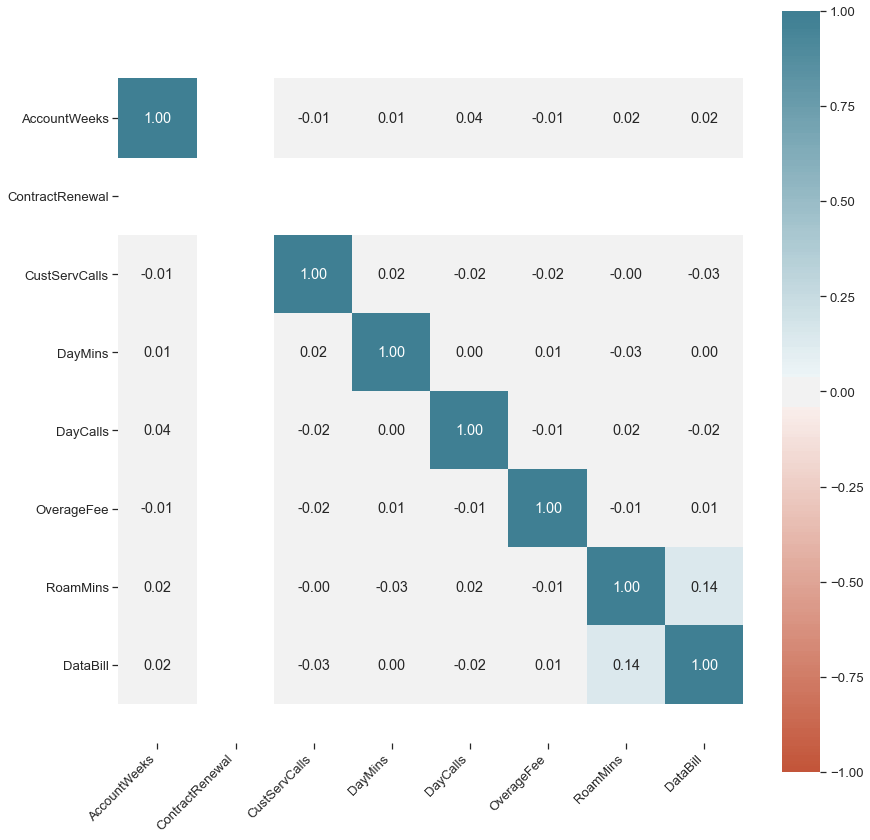

In [72]:
# Checking to see correlation of the features

df_lr = pd.DataFrame(X)
df_lr.columns=['AccountWeeks','ContractRenewal','CustServCalls','DayMins','DayCalls','OverageFee','RoamMins','DataBill']

corr = df_lr.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [73]:
# Scaling 

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_lr))
z

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[0.69359836,        nan, 0.42812509, ..., 0.07094413, 0.09907174,
        1.50819772],
       [0.16414862,        nan, 0.42812509, ..., 0.10699438, 1.282333  ,
        2.28464702],
       [0.92050538,        nan, 1.25636179, ..., 1.59707146, 0.72230405,
        0.58821539],
       ...,
       [0.81911516,        nan, 1.22834832, ..., 0.95217251, 0.2484128 ,
        0.58821539],
       [1.82759084,        nan, 0.40011162, ..., 1.75960756, 1.43167405,
        0.58821539],
       [0.66784381,        nan, 1.25636179, ..., 1.30297103, 1.282333  ,
        2.28464702]])

In [74]:
# Outliers

len(np.where(z > 3)[0])

<ipython-input-74-2300473cc283>:3: RuntimeWarning: invalid value encountered in greater
  len(np.where(z > 3)[0])


10

In [75]:
#dropping the outliers

outliers = list(set(np.where(z > 3)[0]))
new_df = df_lr.drop(outliers, axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

<ipython-input-75-77155015024a>:3: RuntimeWarning: invalid value encountered in greater
  outliers = list(set(np.where(z > 3)[0]))


,index,AccountWeeks,ContractRenewal,CustServCalls,DayMins,DayCalls,OverageFee,RoamMins,DataBill
0,0,128.0,1.0,1.0,265.1,110.0,9.87,10.0,2.70
1,1,107.0,1.0,1.0,161.6,123.0,9.78,13.7,3.70
2,2,137.0,1.0,0.0,243.4,114.0,6.06,12.2,0.00
3,3,121.0,1.0,3.0,218.2,88.0,17.43,7.5,2.03
4,5,65.0,1.0,4.0,129.1,137.0,11.43,12.7,0.00
...,...,...,...,...,...,...,...,...,...
2912,2922,79.0,1.0,2.0,134.7,98.0,9.49,11.8,0.00
2913,2923,192.0,1.0,2.0,156.2,77.0,10.78,9.9,2.67
2914,2924,68.0,1.0,3.0,231.1,57.0,7.67,9.6,0.00
2915,2925,28.0,1.0,2.0,180.8,109.0,14.44,14.1,0.00


2917

In [76]:
# scaling features

X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[ 0.69302534,  0.        , -0.42825362, ..., -0.07096232,
        -0.10195342,  1.50798584],
       [ 0.16350564,  0.        , -0.42825362, ..., -0.10710008,
         1.29039517,  2.28472851],
       [ 0.91996236,  0.        , -1.25609711, ..., -1.6007942 ,
         0.72592952, -0.58921936],
       ...,
       [-0.81988809,  0.        ,  1.22743335, ..., -0.95432981,
        -0.25247759, -0.58921936],
       [-1.82849704,  0.        ,  0.39958986, ...,  1.76403287,
         1.44091934, -0.58921936],
       [-0.66859674,  0.        , -1.25609711, ...,  1.30628789,
         1.29039517,  2.28472851]])

In [77]:
# checking the accuracy again with the outliers dropped and features scaled

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

print("Score of the train set :",modelb.score(X_train,y_train))
print("Score of the test set :",modelb.score(X_test,y_test))


Score of the train set : 0.1254044921910511
Score of the test set : 0.13068612208664265
